# 확률적 경사 하강법(SGD: Stochastic Gradient Descent)
- 머신러닝에도 많이 사용하지만 실질적으로는 딥러닝에서 많이 사용한다.       
- 데이터가 추가 되었을 경우 머신러닝 처리 방법     

1. 새로운 데이터로 모델을 추가하여 새롭게 학습하여 처리한다.
2. 추가된 갯수만큼 기존의 데이터를 버리고 사용한다. 
3. 기존 모델을 수정하면서 사용한다 (점진적 학습방법)


- 데이터가 추가하였을 경우에도 새로운 모델을 만들지 않고 기존의 모델을 수정하면서 사용할 수 있는 방법     
- 머신러닝 및 딥러닝 알고리즘을 훈련하는 방법 또는 최적화 하는 방법이지 머신러닝이나 딥러닝 모델은 아님.     
- 확률족 : 랜덤, 경사 : 기울기를 의미     
- 곡선의 최적점을 찾기 위해 기울기를 기준으로 조금씩 이동하면서 최적점을 찾는 방법     


- Epoch : 훈련세트를 다 사용하였을 경우의 단계
- 미니배치(mini batch)경사 하강법 중 미니배치의 갯수 : Hyper parameter, 보통은ㄴ 2의 배수
- 배치 경사 하강법 : 샘플을 한번에 몽땅 꺼내면 컴퓨터 메모리나 CPU에 영향을 줄 수 있어서 거의 사용이 안 되고 주로 
확률적 경사하강법이나 미니배치를 사용한다.

### 손실함수(비용함수)
- 머신러닝 알고리즘이 에러율을 측정하는 함수  
- 손실함수 값이 적은것이 정확도가 높은 것이다.    
- 확률적 경사함수를 통해서 손실함수가 낮은 값을 찾는 것이다.      
- 분류함수인 경우에는 정확도를 사용하는데 이 정확도의 값은 미분할수가 없어서(연속성이 없어) 손실함수로 사용할 수 없다.    
- 분류함수인 경우에는 로지스틱 손실함수, 이진크로스엔트로피 손실함수를 사용한다


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

fish = pd.read_csv("../Data/fishes.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [6]:
# Feature
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [7]:
# Target
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [8]:
# Train과 Test로 분리
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target =\
    train_test_split(fish_input,fish_target,random_state=42)

In [9]:
# 표준화 시키기
# : 경사하강법을 사용하는 경우에는 샘플의 크기때문에 경사의 각도가 바뀔수 있으므로 
# 각 Feature의 Scale을 표준점수로 변경해야한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

---
### 확률적 경사하강법의 분류 알고리즘 적용

In [10]:
from sklearn.linear_model import SGDClassifier

In [12]:
sc = SGDClassifier(
    loss= 'log',
    max_iter=10,
    random_state=42
)
# loss = 'log : 로지스틱 손실함수
# max_iter :Epoch(반복함수)

In [13]:
sc.fit(train_scaled,train_target)
print("train score :",sc.score(train_scaled,train_target))
print("test  score :",sc.score(test_scaled,test_target))

train score : 0.773109243697479
test  score : 0.775


> score가 별로 안 좋고 과소적합 되어서    
> partial_fit을 사용한다. 기존 w와 b의 계수값을 유지한채 Update하는 방법      
> 만약에 다시 fit을 사용하면 기존에 학습했던 내용을 모두 버린다.    

In [18]:
sc.partial_fit(train_scaled,train_target)
print("train score :",sc.score(train_scaled,train_target))
print("test  score :",sc.score(test_scaled,test_target))

train score : 0.8571428571428571
test  score : 0.9


> 처음의 점수보다 기존에 학습했던 내용에 새로운 학습내용을 수정해서 사용하면 점수가 증가했다.          
> 이와 같이 점진적으로 정확도를 높이는 방법이 확률적 경사 하강법이다.     
> 처음보다는 점수가 증가했지만 아직 과소적합이다. 약간의 차이가 나는 과대적합이 제일 좋은방법이다    

---
### Epoch와 과대/과소적합
- 규제값이 작아지면 과대적합이 된다. 
- 조기종료(Early Stopping) : 적합한 Epoch의 위치를 찾으면 종료한다. 

In [19]:
import numpy as np
sc = SGDClassifier(loss='log',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [20]:
for _ in range(0,300): # 의미없는 변수일 경우, _를 사용 
    sc.partial_fit(train_scaled,train_target,classes=classes)
    # partial_fit을 하기 전에 fit을 사용하지 않았으면, classes를 정의해 주어야 부분 수정이 아니라 
    # 전체 classes에 대해 수정 작업이 일어난다.
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

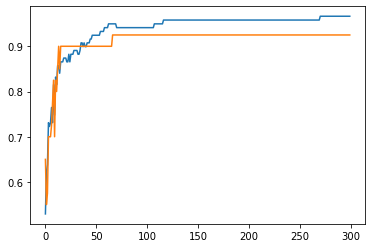

In [21]:
# 그래프로 그려보기
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

> 100정도의 Epoch가 좋은 것 같다. 

In [22]:
# 새롭게 시작
sc = SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42) # None = -1
# tol: 조기 종료 시점이나 현재는 정지기준이 없고 반복기간동안의 최적의 손실값보다 큰 경우 조기 종료된다.
sc.fit(train_scaled,train_target) 
print("train score :",sc.score(train_scaled,train_target))
print("test  score :",sc.score(test_scaled,test_target))
  

train score : 0.957983193277311
test  score : 0.925


In [39]:
# 조기종료 시점 적용
sc = SGDClassifier(loss='log',max_iter=100,tol=1.0e-1,random_state=42)
sc.fit(train_scaled,train_target) 
print("train score :",sc.score(train_scaled,train_target))
print("test  score :",sc.score(test_scaled,test_target))

train score : 0.7058823529411765
test  score : 0.7


> 위의 그래프를 보면 주황색 부분이 치고올라오는 부분이 있으므로 tol을 바꾸어도 100 이전에서 조기종료가 됨    
=> 즉, 해당 모양의 그래프 같은 경우에는 조기 종료를 사용하면 안됨

---
### SVM을 이용한 확률적 경사 하강법

In [40]:
sc = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42) # hinge : SVM
sc.fit(train_scaled,train_target) 
print("train score :",sc.score(train_scaled,train_target))
print("test  score :",sc.score(test_scaled,test_target))

train score : 0.9495798319327731
test  score : 0.925
